#**Descriptive Statistics**

Descriptive statistics analysis helps to describe the basic features of dataset and obtain a brief summary of the data.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('eda.csv')
df.head()

,quarter,Year,Sales,Type
0,Q1,2000,694513,B
1,Q2,2000,751698,A
2,Q3,2000,745556,B
3,Q4,2000,791509,A
4,Q1,2001,704201,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   quarter  68 non-null     object
 1   Year     68 non-null     int64 
 2   Sales    68 non-null     int64 
 3   Type     68 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


**Line graph**

In [ ]:
# Ilustrate Overall Weekly sales 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


Overall_sales = df.groupby('Year', as_index=False)['Sales'].sum()

sales_plot = go.Scatter(x=Overall_sales['Year'], y=Overall_sales['Sales'])
layout = go.Layout(title='Overall Sales', xaxis=dict(title='Year'),
                   yaxis=dict(title='Sales'))
fig = go.Figure(data=[sales_plot], layout=layout)
iplot(fig)

**Describe Numerical Value**

In [ ]:
df.describe()

,Year,Sales
count,68.000000,6.800000e+01
mean,2008.000000,9.690075e+05
std,4.935404,1.517203e+05
min,2000.000000,6.945130e+05
25%,2004.000000,8.345058e+05
50%,2008.000000,9.641050e+05
75%,2012.000000,1.069927e+06
max,2016.000000,1.315101e+06


In [ ]:
df['Sales'].describe()

count    6.800000e+01
mean     9.690075e+05
std      1.517203e+05
min      6.945130e+05
25%      8.345058e+05
50%      9.641050e+05
75%      1.069927e+06
max      1.315101e+06
Name: Sales, dtype: float64

In [ ]:
df['Sales'].describe()['mean']

969007.5294117647

**Box Plot**

We can describe the values of the columns by calculating the sum of several percentiles and show in boxplot. 

In [ ]:
print('lower extremes= ',df['Sales'].quantile(0),'\n'
      'Lower Quartile:' ,df['Sales'].quantile(0.25),'\n'
      'Median= ',df['Sales'].quantile(0.5),'\n'
      'Upper Quartile:' ,df['Sales'].quantile(0.75),'\n'
      'Upper Extremes= ',df['Sales'].quantile(1),'\n'
      'Random Quartile:' ,df['Sales'].quantile(0.8))

lower extremes=  694513.0 
Lower Quartile: 834505.75 
Median=  964105.0 
Upper Quartile: 1069927.25 
Upper Extremes=  1315101.0 
Random Quartile: 1108802.0


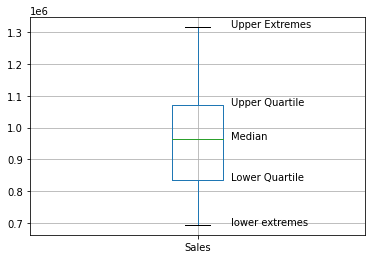

In [ ]:
figsize=(8,6)
df.boxplot(column="Sales",return_type='axes')
plt.text(x=1.1, y=df['Sales'].quantile(.25), s="Lower Quartile",)
plt.text(x=1.1,y=df['Sales'].quantile(.5) ,s="Median")
plt.text(x=1.1, y=df['Sales'].quantile(.75), s="Upper Quartile")
plt.text(x=1.1, y=df['Sales'].quantile(0), s="lower extremes")
plt.text(x=1.1, y=df['Sales'].quantile(1), s="Upper Extremes ")
plt.show()

**Line graph**

In [ ]:
# Ilustrate Overall Weekly sales 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


Overall_sales = df.groupby('Year', as_index=False)['Sales'].sum()

sales_plot = go.Scatter(x=Overall_sales['Year'], y=Overall_sales['Sales'])
layout = go.Layout(title='Overall Sales', xaxis=dict(title='Year'),
                   yaxis=dict(title='Sales'))
fig = go.Figure(data=[sales_plot], layout=layout)
iplot(fig)

**Scatter Plot**

A scatter plot is a diagram where each value in the data set is represented by a dot.

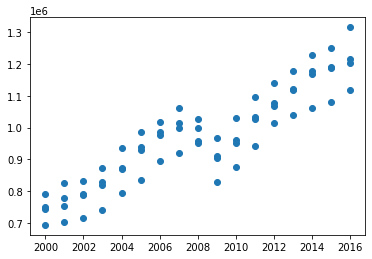

In [ ]:
plt.scatter(df.Year,df.Sales)
plt.show()

**Histogram Plot**

A histogram is a graph showing frequency distributions.

It is a graph showing the number of observations within each given interval.

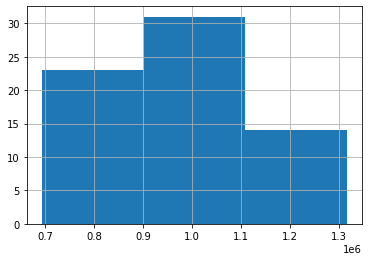

In [ ]:
hist = df.Sales.hist(bins=3)

#**Categorical**

In [ ]:
df['Type'].unique()

array(['B', 'A', 'C', 'D', 'E', 'F'], dtype=object)

In [ ]:
len(df['Type'].unique())

6

**Frequency Distribution** 

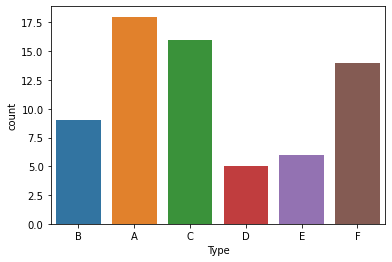

In [ ]:
import seaborn as sns

sns.countplot(data = df, x = 'Type')

**Box Plot**

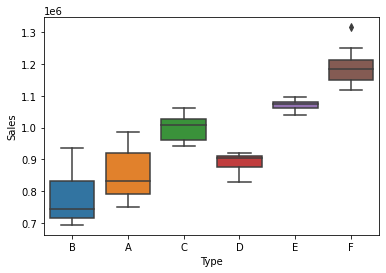

In [ ]:
sns.boxplot(data = df, x='Type', y='Sales')

**Violin Plot**

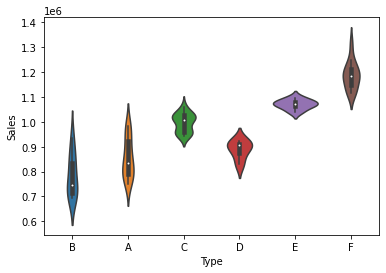

In [ ]:
sns.violinplot(data = df, x='Type', y='Sales')

**Swarm Plot**

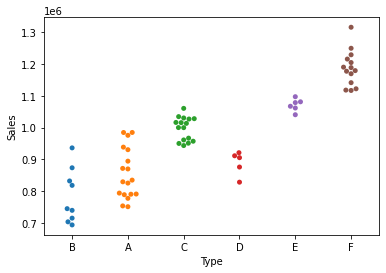

In [ ]:
sns.swarmplot (data = df, x='Type', y='Sales')

**Pie chart**

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion.

(-1.1089968517311448,
 1.1004284373966753,
 -1.119660792231324,
 1.1009362708607664)

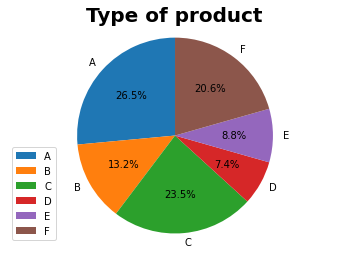

In [ ]:
figsize=(25, 10)
df.groupby('Type').size().plot(kind='pie', startangle=90,autopct='%1.1f%%')
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('Type of product',fontweight="bold",fontsize = 20)
plt.axis('equal')